In [56]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

## 3 sleep equation #3
### 3.1 VIFs
Для набора данных `sleep75` рассмотрим линейную регрессию


**sleep на totwrk, south, totwrk*south, age, male, smsa**.

Какие регрессии нужно рассматривать для вычисления показателей VIF для коэффициентов
**totwrk, south, male**?

Ответ

- **totwrk на south, totwrk*south, age, male, smsa**
- **south на totwrk, totwrk*south, age, male, smsa**
- **totwrk*south на totwrk, south, age, male, smsa**


In [57]:
data_sleep = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
# data_sleep = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/SwissLabor.csv')
data_sleep.shape

(706, 34)

In [58]:
# Модель sleep на totwrk, south, twrk_south, age, male, smsa
formula = 'sleep~totwrk+south+I(totwrk*south)+age+male+smsa'
Sleep_eq31 = smf.ols(formula = formula, data = data_sleep).fit()

In [59]:
# Модель 1:  totwrk на south, twrk_south, age, male, smsa
# Создаем спецификацию модели через формулу и подгоняем модель
formula = 'totwrk~south+I(totwrk*south)+age+male+smsa'
model_31 = smf.ols(formula = formula, data = data_sleep).fit()

In [60]:
# Модель 2: south на totwrk, twrk_south. age. male. smsa
# Создаем спецификацию модели через формулу и подгоняем модель
formula = 'south~totwrk+I(totwrk*south)+age+male+smsa'
model_32 = smf.ols(formula = formula, data = data_sleep).fit()

In [61]:
# Модель 3: twrk_south на totwrk, south, age, male, smsa
# Создаем спецификацию модели через формулу и подгоняем модель
formula = 'I(totwrk*south)~totwrk+south+age+male+smsa'
model_33 = smf.ols(formula = formula, data = data_sleep).fit()

In [62]:
#Результаты подгонки
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'R-squared': lambda x: "%#8.3f" % x.rsquared,
             'Adj. R-squared': lambda x: "%#8.3f" % x.rsquared_adj,
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }

print(
    summary_col(
        [model_31, model_32, model_33],
        stars=True, float_format='%.4f',
        info_dict = info_dict
    )
)


                        totwrk      south    I(totwrk * south)
--------------------------------------------------------------
I(totwrk * south)   0.8620***     0.0004***                   
                    (0.0942)      (0.0000)                    
Intercept           1883.9357***  0.1157***  -216.7587***     
                    (120.3995)    (0.0220)   (52.4193)        
R-squared           0.2409        0.8831     0.8855           
R-squared Adj.      0.2355        0.8822     0.8847           
age                 -3.4378       0.0004     -1.2099          
                    (2.7586)      (0.0004)   (1.0465)         
male                645.9959***   -0.0070    3.8044           
                    (63.6042)     (0.0109)   (25.8408)        
smsa                -46.6408      -0.0243**  2.6760           
                    (65.5610)     (0.0105)   (24.8757)        
south               -1780.7321***            2208.7476***     
                    (225.4041)               (31.4907)

In [63]:
# VIF для totwrk c округлением до 2-х десятичных знаков
VIF_1 = 1/(1 - model_31.rsquared)
VIF_1.round(2)

1.32

In [64]:
# VIF для south c округлением до 2-х десятичных знаков
VIF_2 = 1/(1 - model_32.rsquared)
VIF_2.round(2)

8.55

In [65]:
# VIF для totwrk*south c округлением до 2-х десятичных знаков
VIF_3 = 1/(1 - model_33.rsquared)
VIF_3.round(2)

8.73

In [66]:
# names of exog
Sleep_eq31.model.exog_names

['Intercept', 'totwrk', 'south', 'I(totwrk * south)', 'age', 'male', 'smsa']

In [67]:
# VIF для totwrk c округлением до 2-х десятичных знаков
VIF_1 = variance_inflation_factor(exog = Sleep_eq31.model.exog, exog_idx = 1)
print('VIF for exog', Sleep_eq31.model.exog_names[1], ': ', VIF_1.round(2))

VIF for exog totwrk :  1.32


In [68]:
# VIF для south c округлением до 2-х десятичных знаков
VIF_2 = variance_inflation_factor(exog = Sleep_eq31.model.exog, exog_idx = 2)
print('VIF for exog', Sleep_eq31.model.exog_names[2], ': ', VIF_2.round(2))

VIF for exog south :  8.55


In [69]:
# VIF для totwrk*south c округлением до 2-х десятичных знаков
VIF_3 = variance_inflation_factor(exog = Sleep_eq31.model.exog, exog_idx = 3)
print('VIF for exog', Sleep_eq31.model.exog_names[3], ': ', VIF_3.round(2))

VIF for exog I(totwrk * south) :  8.73


### 3.2 Последствия

Для набора данных `sleep75` рассмотрим линейную регрессию
**sleep на totwrk, south, totwrk⋆south, age, male, smsa, marr.**

Результаты оценивания:


In [70]:
# Модель sleep на totwrk/100, totwrk^2/10000, age, smsa, male
formula = 'sleep~totwrk+south+I(totwrk*south)+age+male+smsa+marr'
Sleep_eq32 = smf.ols(formula = formula, data = data_sleep).fit()


In [71]:
info_dict = {'No. Observations': lambda x: '{0:d}'.format(int(x.nobs)), 
             'Residual Std. Error': lambda x: "%#8.3f" % x.mse_resid**0.5,
             'F-statistic': lambda x: '{:.3f}'.format(x.fvalue), 
             'Prob (F-statistic)': lambda x: '{:.3f}'.format(x.f_pvalue)
             }
print(Sleep_eq32)
print(summary_col(Sleep_eq32, float_format='%.3f', stars=True, info_dict = info_dict))


                       sleep   
-------------------------------
Intercept           3458.811***
                    (78.683)   
totwrk              -0.177***  
                    (0.019)    
south               -39.982    
                    (118.087)  
I(totwrk * south)   0.064      
                    (0.050)    
age                 2.901**    
                    (1.386)    
male                86.269**   
                    (34.833)   
smsa                -54.647*   
                    (33.074)   
marr                29.985     
                    (41.857)   
R-squared           0.133      
R-squared Adj.      0.124      
No. Observations    706        
Residual Std. Error 415.835    
F-statistic         15.319     
Prob (F-statistic)  0.000      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [72]:
# Уровень значимости 5%
alpha = 0.05
df = summary_params(Sleep_eq32, alpha=alpha)
df['significance'] = df.apply(lambda x: 'Значим' if x['P>|t|']<alpha else 'Незначим', axis=1)
df

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],significance
Intercept,3458.811104,78.682955,43.958836,2.922313e-203,3304.327472,3613.294735,Значим
totwrk,-0.176879,0.019050,-9.285179,2.005225e-19,-0.214280,-0.139478,Значим
south,-39.982453,118.086614,-0.338586,7.350236e-01,-271.829986,191.865080,Незначим
I(totwrk * south),0.063785,0.050019,1.275210,2.026593e-01,-0.034421,0.161992,Незначим
age,2.901004,1.386244,2.092708,3.673571e-02,0.179297,5.622711,Значим
male,86.269452,34.833373,2.476632,1.349874e-02,17.878707,154.660198,Значим
smsa,-54.647254,33.073979,-1.652273,9.892856e-02,-119.583661,10.289153,Незначим
marr,29.985029,41.857023,0.716368,4.740038e-01,-52.195731,112.165788,Незначим


### На уровне значимости 5% значимы коэффициенты: \"totwrk\" \"age\" \"male\"


## Тестируется значимость влияния занятости, т.е. гипотеза

### $H_0:\beta_{south}=\beta_{totwrk*south}=0$.

In [73]:
# тестовая F_stat
f_stat = Sleep_eq32.f_test('south = I(totwrk * south) = 0').fvalue
print(f'F_stat = {f_stat:3.3f}')

F_stat = 3.737


In [74]:
# критическое значение F_crit
# alpha=0.1
f_crit = scipy.stats.f.ppf(1-alpha, 2, 700).round(2)
print(f'F_crit = {f_crit:3.3f}')

F_crit = 3.010


### Так как F_stat > F_crit, то гипотеза отвергается. Значит коэффициенты совместно значимы

In [75]:
#VIFs
VIFS = pd.DataFrame({'VIF': [variance_inflation_factor(Sleep_eq32.model.exog, i) for i in range(int(Sleep_eq32.df_model+1))]}, index=Sleep_eq32.model.exog_names)
VIFS.drop(index='Intercept', inplace=True)
VIFS

,VIF
totwrk,1.328161
south,8.553057
I(totwrk * south),8.734279
age,1.007988
male,1.216541
smsa,1.071376
marr,1.048792


In [76]:
# Матрица корреляций
df_sleep = data_sleep[['totwrk', 'south', 'age', 'male', 'smsa', 'marr']].copy()
df_sleep['totwrk * south'] = df_sleep['totwrk'] * df_sleep['south']
# df_sleep['I(totwrk ** 2 / 10000)'] = (data_sleep['totwrk']**2)/10000
corr_matrix = df_sleep.corr().round(3)
corr_matrix

,totwrk,south,age,male,smsa,marr,totwrk * south
totwrk,1.000,0.051,-0.050,0.376,-0.038,-0.025,0.175
south,0.051,1.000,-0.018,-0.034,-0.238,-0.036,0.932
age,-0.050,-0.018,1.000,0.032,0.025,0.018,-0.038
male,0.376,-0.034,0.032,1.000,0.007,0.167,0.018
smsa,-0.038,-0.238,0.025,0.007,1.000,-0.081,-0.224
marr,-0.025,-0.036,0.018,0.167,-0.081,1.000,-0.038
totwrk * south,0.175,0.932,-0.038,0.018,-0.224,-0.038,1.000


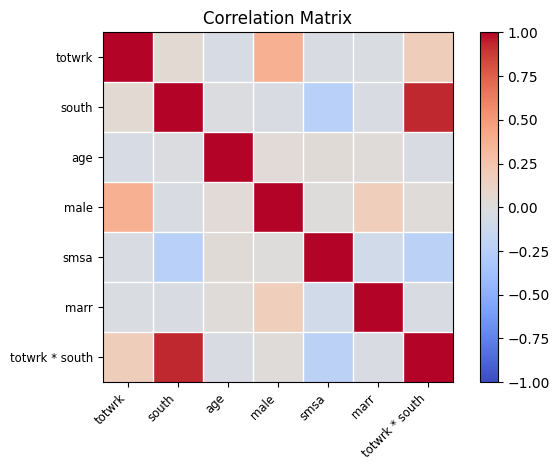

In [77]:
# Визуализация корреляций
sm.graphics.plot_corr(corr_matrix, xnames=df_sleep.columns, normcolor=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

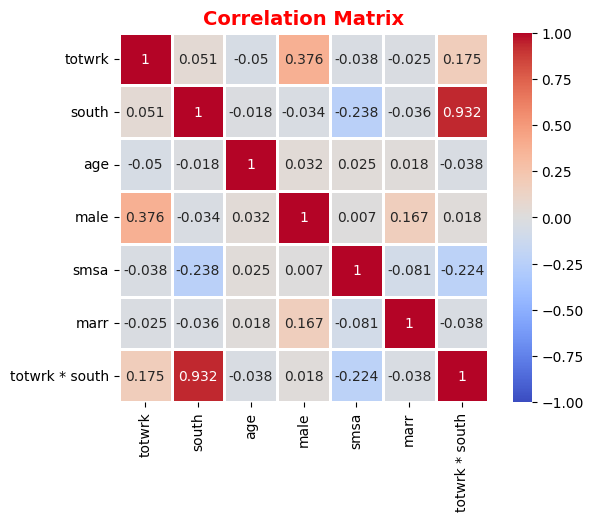

In [78]:
# Визуализация корреляций
sns.heatmap(corr_matrix, annot=True, fmt='.3g', vmin=-1, vmax=1, center=0, cmap='coolwarm', 
            square=True, linewidths=1, linecolor='white')
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

### "Продвинутая" визуализация корреляций

Text(0.5, 1.0, 'Correlation Matrix')

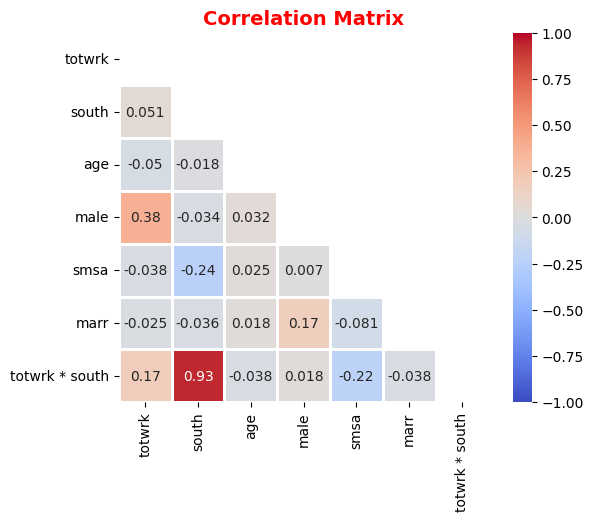

In [79]:
corr_matrix = df_sleep.corr().round(3)
# нижнетреугольная матрица корреляций
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, linewidths=1, linecolor='white', mask=mask)
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix')

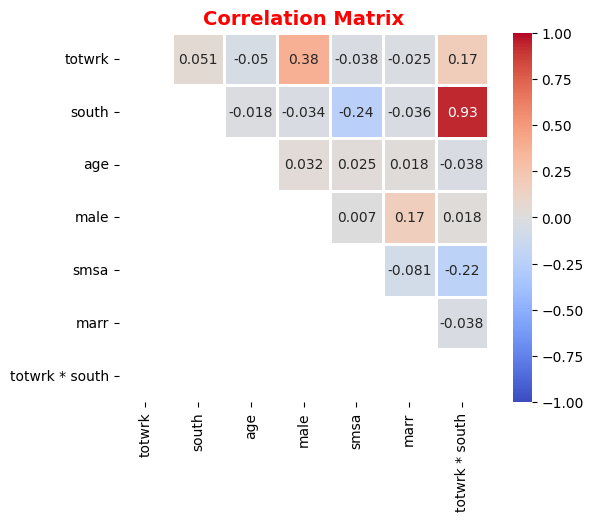

In [80]:
corr_matrix = df_sleep.corr().round(3)
# верхнетреугольная матрица корреляций
mask = np.tril(corr_matrix)
sns.heatmap(corr_matrix, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', square=True, linewidths=1, linecolor='white', mask=mask)
# add customized title to heatmap
plt.title('Correlation Matrix', loc='center', color='red', size=14, weight='bold')

In [81]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_matrix[mask] = np.nan
(corr_matrix
 .style
 .set_properties(**{'text-align': 'center'})
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .format(precision=2, na_rep=" ")
 .set_caption('Correlation Matrix'))

,totwrk,south,age,male,smsa,marr,totwrk * south
totwrk,,,,,,,
south,0.05,,,,,,
age,-0.05,-0.02,,,,,
male,0.38,-0.03,0.03,,,,
smsa,-0.04,-0.24,0.03,0.01,,,
marr,-0.03,-0.04,0.02,0.17,-0.08,,
totwrk * south,0.17,0.93,-0.04,0.02,-0.22,-0.04,
